In [1]:
from sklearn.datasets import load_boston

In [2]:
data=load_boston()

In [3]:
X,y=data['data'],data['target']

In [4]:
import numpy as np
np.shape(X)

(506, 13)

In [5]:
y[1]

21.6

In [6]:
len(X[:,0])

506

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

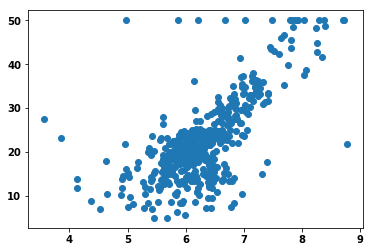

In [45]:
draw_rm_and_price()

In [12]:
import random

In [13]:
def price(rm,k,b):
    return k*rm+b

In [46]:
X[:,5]

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

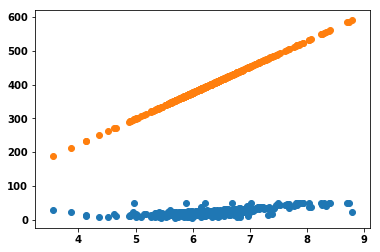

In [66]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b=random.randint(-100,100)
price_by_random_k_and_b = [price(r, k,b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [64]:
#平方损失
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [65]:
trying_times = 20000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() *200 - 100
    price_by_random_k_and_b = [price(r, k,b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {},get best_b: {}, and the loss is: {}'.format(i, best_k,best_b,min_loss))

When time is : 0, get best_k: -82.07021102954604,get best_b: 90.52652797194068, and the loss is: 447.78754876567194
When time is : 3, get best_k: -56.549497621585566,get best_b: 52.98309712532844, and the loss is: 324.94262653886625
When time is : 4, get best_k: -52.711537346844395,get best_b: 46.25150591645689, and the loss is: 307.55404062780957
When time is : 7, get best_k: -19.864302196536144,get best_b: 1.5002891154571643, and the loss is: 145.87239387375203
When time is : 14, get best_k: 28.837702499061066,get best_b: -31.10593080957949, and the loss is: 127.59567964412938
When time is : 15, get best_k: 14.585362871103143,get best_b: 54.8232662805338, and the loss is: 123.95413300816183
When time is : 18, get best_k: 8.23865150069976,get best_b: -14.821806445321187, and the loss is: 14.79440579354329
When time is : 92, get best_k: 4.3778338303204265,get best_b: 0.6712953932096895, and the loss is: 7.8308998630583995
When time is : 343, get best_k: 15.327073966546223,get best_b: -

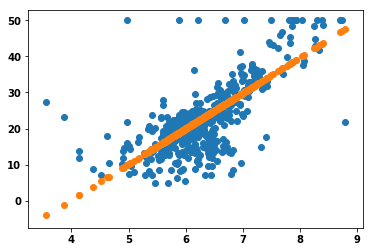

In [63]:
X_rm = X[:,5]
k = 9.874920335022225
b = -39.2336252243014
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

 第二种：方向转移


In [75]:

trying_times = 20000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1,+1),  # first element: k's change direction, second element: b's change direction
    (+1,-1),
    (-1,+1),
    (-1,-1)
]

next_direction = random.choice(direction)

scalar = 0.1
update_time=0

for i in range(trying_times):
    
    k_direction ,b_direction= next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k,current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k,best_b = current_k,current_b
        
        next_direction = next_direction
        update_time+=1
        if update_time%10==0:
            print('When time is : {}, get best_k: {},get best_b:{}, and the loss is: {}'.format(i, best_k, best_b,min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 11, get best_k: -80.6943208868441,get best_b:-45.38486740825455, and the loss is: 575.0519776418245
When time is : 21, get best_k: -79.69432088684415,get best_b:-46.384867408254564, and the loss is: 569.767343254472
When time is : 31, get best_k: -78.69432088684421,get best_b:-47.38486740825458, and the loss is: 564.482708867122
When time is : 41, get best_k: -77.69432088684427,get best_b:-48.38486740825459, and the loss is: 559.1980744797708
When time is : 51, get best_k: -76.69432088684432,get best_b:-49.38486740825461, and the loss is: 553.913440092419
When time is : 61, get best_k: -75.69432088684438,get best_b:-50.38486740825462, and the loss is: 548.6288057050675
When time is : 71, get best_k: -74.69432088684444,get best_b:-51.384867408254635, and the loss is: 543.3441713177159
When time is : 81, get best_k: -73.6943208868445,get best_b:-52.38486740825465, and the loss is: 538.0595369303649
When time is : 91, get best_k: -72.69432088684455,get best_b:-53.3848674082

When time is : 741, get best_k: -7.6943208868443875,get best_b:-118.38486740825172, and the loss is: 189.27366736514372
When time is : 751, get best_k: -6.694320886844391,get best_b:-119.38486740825167, and the loss is: 183.9890329777917
When time is : 761, get best_k: -5.694320886844395,get best_b:-120.38486740825161, and the loss is: 178.70439859044018
When time is : 771, get best_k: -4.694320886844398,get best_b:-121.38486740825155, and the loss is: 173.41976420308833
When time is : 781, get best_k: -3.6943208868444,get best_b:-122.3848674082515, and the loss is: 168.13512981573632
When time is : 791, get best_k: -2.694320886844399,get best_b:-123.38486740825144, and the loss is: 162.85049542838462
When time is : 801, get best_k: -1.6943208868443982,get best_b:-124.38486740825138, and the loss is: 157.56586104103266
When time is : 811, get best_k: -0.6943208868443977,get best_b:-125.38486740825132, and the loss is: 152.28122665368073
When time is : 821, get best_k: 0.305679113155602

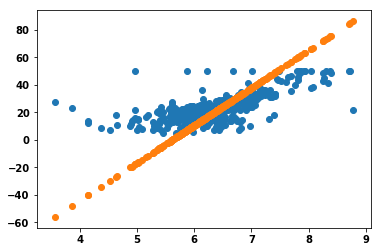

In [76]:
X_rm = X[:,5]
k = 27.305679113155723
b = -153.38486740824973
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

第三种 导数-梯度下降

In [88]:
def partial_k(x,y,y_hat):
    n=len(y)
    gradient=0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient+=abs(x_i)
    return 1/n*gradient


def partial_b(x,y,y_hat):
    n=len(y)
    gradient=0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient+=1
    return 1/n*gradient

In [89]:
trying_times=2000
X,y=data['data'],data['target']
min_loss=float('inf')
current_k=random.random()*200-100
current_b=random.random()*200-100
learning_rate=1e-04
update_time=0
for i in range(trying_times):
    price_by_k_and_b=[price(r,current_k,current_b) for r in X_rm]
    current_loss=loss(y,price_by_k_and_b)
    if current_loss<min_loss:
        min_loss=current_loss
        if i%50==0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    k_gradient=partial_k(X_rm,y,price_by_k_and_b)
    b_gradient=partial_b(X_rm,y,price_by_k_and_b)
    current_k=current_k+(-1*k_gradient)*learning_rate
    current_b=current_b+(-1*b_gradient)*learning_rate

When time is : 0, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the loss is: 274.1707385233429
When time is : 50, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the loss is: 273.96825537642894
When time is : 100, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the loss is: 273.7657722295148
When time is : 150, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the loss is: 273.5632890826008
When time is : 200, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the loss is: 273.36080593568687
When time is : 250, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the loss is: 273.1583227887729
When time is : 300, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the loss is: 272.95583964185903
When time is : 350, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the loss is: 272.75335649494474
When time is : 400, get best_k: 27.80567911315573 best_b: -153.68486740824972, and the 